In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston

In [13]:
boston = load_boston()

In [14]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

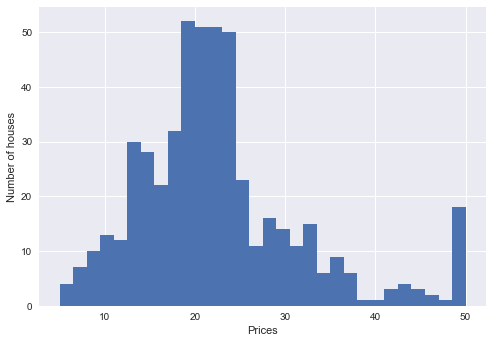

In [17]:
plt.hist(boston.target, bins = 50, histtype=)
plt.xlabel('Prices')
plt.ylabel('Number of houses')

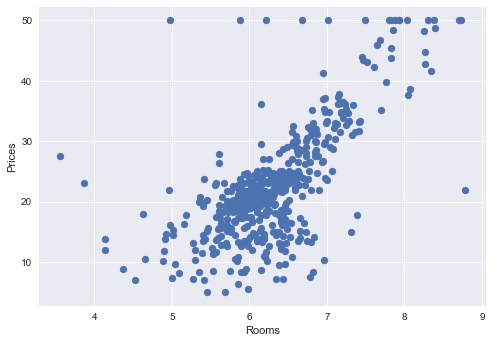

In [20]:
#target is Y for Boston dataset
plt.scatter(boston.data[:,5], boston.target)
plt.xlabel('Rooms')
plt.ylabel('Prices')

In [21]:
boston_df = pd.DataFrame(boston.data)

In [24]:
boston_df.columns = boston.feature_names

In [25]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
boston_df['Price'] = boston.target

In [29]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


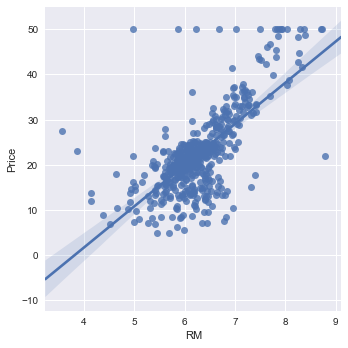

In [30]:
sns.lmplot(x = 'RM', y = 'Price', data = boston_df)

In [40]:
# rooms
X = boston_df.RM
#x to 2-dimensional
X = np.vstack(boston_df.RM)

In [33]:
#!!!!!
X.shape

(506, 1)

In [41]:
Y = boston_df.Price

In [42]:
#array [x,1]
X = np.array(  [  [value, 1] for value in X] )

In [43]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [45]:
m , b = np.linalg.lstsq(X, Y)[0]

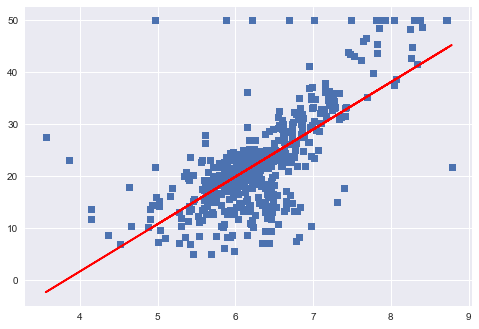

In [51]:
plt.plot(boston_df.RM, boston_df.Price, 's')
x = boston_df.RM
plt.plot(x, m*x + b, 'r', label = 'Best fit line')

In [52]:
#Multiple linear regression model

In [53]:
result = np.linalg.lstsq(X, Y)
error_total = result[1]

In [55]:
rmse = np.sqrt(error_total/len(X))

In [58]:
print('RMS was %.1f' %rmse)

RMS was 6.6


In [59]:
import sklearn
from sklearn.linear_model import LinearRegression

In [60]:
lreg = LinearRegression()

In [62]:
X_multi = boston_df.drop('Price', 1)
Y_target = boston_df.Price

In [63]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
print("Estimated intercept is %.2f" %lreg.intercept_)
print("Coefficient was %d" %len(lreg.coef_))

Estimated intercept is 36.49
Coefficient was 13


In [70]:
coeff_df = pd.DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coef Estim'] = pd.Series(lreg.coef_)

In [76]:
coeff_df

,Features,Coef Estim
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [83]:
#TRAINING AND TEST SET 
from sklearn.cross_validation import train_test_split


c:\programdata\anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [84]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)

In [85]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((379, 2), (127, 2), (379,), (127,))

In [86]:
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [95]:
m1 = np.mean((Y_train - pred_train)**2)
m2 = np.mean((Y_test - pred_test)**2)

In [96]:
print("Fit a model X_train, and calculate the MSE %.2f" %m1)
print("Fit a model X_train, X test Y test and calculate the MSE %.2f" %m2)

Fit a model X_train, and calculate the MSE 45.40
Fit a model X_train, X test Y test and calculate the MSE 38.29


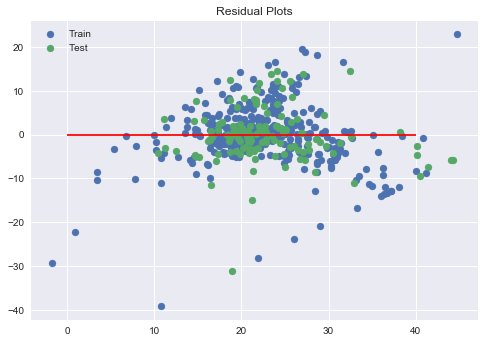

In [106]:
#Residual plots
train = plt.scatter(pred_train, (pred_train - Y_train))
test = plt.scatter(pred_test, (pred_test - Y_test))
plt.hlines(y = 0, xmin = 0, xmax = 40, color = 'r')
plt.legend((train, test), ('Train', 'Test'))
plt.title('Residual Plots')